# **BBM 409: Machine Learning Laboratory 👨🏻‍🔬**
### **Project Assignment 2**  

### **Group 13**

- **Mert Çetin** - 2220356148  
- **Mehmet Oğuz Kocadere** - 2210356021  

### **Environment**  
- **Python Version**: 3.9.6  

In [82]:
import pandas as pd
import numpy as np

# file path
file_path = "financial_risk_assessment.csv"

# read csv file
df = pd.read_csv(file_path)

df.head()

,Age,Gender,Education Level,Marital Status,Income,Credit Score,Loan Amount,Loan Purpose,Employment Status,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,City,State,Country,Previous Defaults,Marital Status Change,Risk Rating
0,49,Male,PhD,Divorced,72799.0,688.0,45713.0,Business,Unemployed,19,Poor,0.154313,120228.0,0.0,Port Elizabeth,AS,Cyprus,2.0,2,Low
1,57,Female,Bachelor's,Widowed,NaN,690.0,33835.0,Auto,Employed,6,Fair,0.148920,55849.0,0.0,North Catherine,OH,Turkmenistan,3.0,2,Medium
2,21,Non-binary,Master's,Single,55687.0,600.0,36623.0,Home,Employed,8,Fair,0.362398,180700.0,3.0,South Scott,OK,Luxembourg,3.0,2,Medium
3,59,Male,Bachelor's,Single,26508.0,622.0,26541.0,Personal,Unemployed,2,Excellent,0.454964,157319.0,3.0,Robinhaven,PR,Uganda,4.0,2,Medium
4,25,Non-binary,Bachelor's,Widowed,49427.0,766.0,36528.0,Personal,Unemployed,10,Fair,0.143242,287140.0,NaN,New Heather,IL,Namibia,3.0,1,Low


# **Part 1: Implementing Decision Tree 🌳**

In [83]:
# Display general information about the dataset
print("🔎 Dataset Information:")
df.info()

# Show number of missing values in each column
print("\n❗ Missing Values per Column:")
print(df.isnull().sum())

# Identify categorical columns
categorical_cols = df.select_dtypes(include="object").columns
print("\n🧩 Categorical Columns:")
print(categorical_cols)

# Show missing values only in categorical columnso
print("\n📋 Missing Values in Categorical Columns:")
print(df[categorical_cols].isnull().sum())

🔎 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 no

### **🤔 Handling Missing Values (Median Imputation)**

In this dataset, some numerical columns like *Income*, *Credit Score*, *Loan Amount*, *Assets Value*, *Number of Dependents*, and *Previous Defaults* had missing values (2,250 missing entries in each column, which is 15% of the data). In this step, we filled the missing values in *Income*, *Credit Score*, *Loan Amount*, and *Assets Value* using the **median** of each column.

We chose the median instead of the average (mean) because the median is less affected by very high or low values (outliers), which are common in financial data. This method helps us keep the data more stable and prevents our decision tree model from learning wrong patterns due to missing values.

We also checked the categorical columns for missing values (such as *Gender*, *Education Level*, *Marital Status*, *Loan Purpose*, *Employment Status*, etc.), and confirmed that there were **no missing values** in these columns. Therefore, no additional imputation was needed for categorical data.

**Note:** For *Number of Dependents* and *Previous Defaults*, we will analyze their frequency distributions in the next step to determine the best imputation strategy, as these columns contain discrete values (0, 1, 2, 3 or 4) and require a more careful approach to preserve their distribution.

In [84]:
# List of numerical columns with missing values
numeric_missing_cols = [
    "Income", "Credit Score", "Loan Amount",
    "Assets Value", "Number of Dependents",
    "Previous Defaults"
]

# Income için eksik değerleri doldurma
for edu in df['Education Level'].unique():
    for emp in df['Employment Status'].unique():
        mask = (df['Education Level'] == edu) & (df['Employment Status'] == emp)
        median_income = df.loc[mask, 'Income'].median()
        df.loc[mask & df['Income'].isna(), 'Income'] = median_income

# Credit Score için Payment History'ye göre doldurma
for payment in df['Payment History'].unique():
    mask = df['Payment History'] == payment
    median_score = df.loc[mask, 'Credit Score'].median()
    df.loc[mask & df['Credit Score'].isna(), 'Credit Score'] = median_score

# Kalan eksik değerler için genel medyan
df['Income'].fillna(df['Income'].median(), inplace=True)
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
df['Loan Amount'].fillna(df['Loan Amount'].median(), inplace=True)
df['Assets Value'].fillna(df['Assets Value'].median(), inplace=True)

# Verify that missing values in these columns have been filled
print("\nMissing values after median imputation (excluding Number of Dependents and Previous Defaults):")
print(df[["Income", "Credit Score", "Loan Amount", "Assets Value"]].isnull().sum())


Missing values after median imputation (excluding Number of Dependents and Previous Defaults):
Income          0
Credit Score    0
Loan Amount     0
Assets Value    0
dtype: int64


/var/folders/tv/v5jdxc154fx7qdyd5fsmb4pr0000gn/T/ipykernel_57970/1173312957.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)
/var/folders/tv/v5jdxc154fx7qdyd5fsmb4pr0000gn/T/ipykernel_57970/1173312957.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

### **🎲 Imputation for Number of Dependents and Previous Defaults (Random Imputation)**

We applied **random imputation** to handle missing values in *Number of Dependents* and *Previous Defaults*.

For each column, we calculated the probability distribution of the existing values (excluding NaN) and used these probabilities to randomly assign values to the 2,250 missing entries. This approach ensures that the original distribution is preserved, maintaining balanced frequencies and proportions after imputation. Random imputation keeps the data’s natural structure intact, potentially enhancing the informativeness of these features in the model.

In [85]:
# Random imputation for "Number of Dependents" and "Previous Defaults"
def random_impute(df, target_col):
    # Calculate the frequency of each category in the target column
    probs = df[target_col].value_counts(normalize=True, dropna=True)
    # Calculate the number of missing values in the target column
    n_missing = df[target_col].isnull().sum()
    # Generate random values based on the calculated probabilities
    imputed_values = np.random.choice(probs.index, size=n_missing, p=probs.values)
    # Fill the missing values in the target column with the generated random values
    df.loc[df[target_col].isnull(), target_col] = imputed_values
    return df

# Apply random imputation for "Number of Dependents" and "Previous Defaults"
df = random_impute(df, "Number of Dependents")
df = random_impute(df, "Previous Defaults")

# Verify that missing values in "Number of Dependents" and "Previous  Defaults" have been filled
print("\nMissing values after random imputation:")
print(df[["Number of Dependents", "Previous Defaults"]].isnull().sum())

# Display the updated frequency and probability distributions
print("\nNumber of Dependents - New Frequencies:")
print(df["Number of Dependents"].value_counts())
print("\nNumber of Dependents - New Probabilities:")
print(df["Number of Dependents"].value_counts(normalize=True))

print("\nPrevious Defaults - New Frequencies:")
print(df["Previous Defaults"].value_counts())
print("\nPrevious Defaults - New Probabilities:")
print(df["Previous Defaults"].value_counts(normalize=True))


Missing values after random imputation:
Number of Dependents    0
Previous Defaults       0
dtype: int64

Number of Dependents - New Frequencies:
Number of Dependents
4.0    3092
1.0    3061
3.0    3006
2.0    2962
0.0    2879
Name: count, dtype: int64

Number of Dependents - New Probabilities:
Number of Dependents
4.0    0.206133
1.0    0.204067
3.0    0.200400
2.0    0.197467
0.0    0.191933
Name: proportion, dtype: float64

Previous Defaults - New Frequencies:
Previous Defaults
0.0    3052
4.0    3029
1.0    3015
2.0    3014
3.0    2890
Name: count, dtype: int64

Previous Defaults - New Probabilities:
Previous Defaults
0.0    0.203467
4.0    0.201933
1.0    0.201000
2.0    0.200933
3.0    0.192667
Name: proportion, dtype: float64


### **🔠 Encoding Categorical Features**

To prepare the dataset for the ID3 decision tree algorithm, we manually encoded the categorical features into numerical values. This is important because the algorithm requires numerical comparisons to calculate entropy and information gain. Below, each category in features like *Gender*, *Education Level* and *Marital Status* are mapped to an integer by hand.

Gender: [0 1 2]
Education Level: [3 1 2 0]
Marital Status: [2 3 0 1]
Loan Purpose: [3 1 0 2]
Employment Status: [0 1 2]
Payment History: [0 1 3 2]
Risk Rating: [0 1 2]


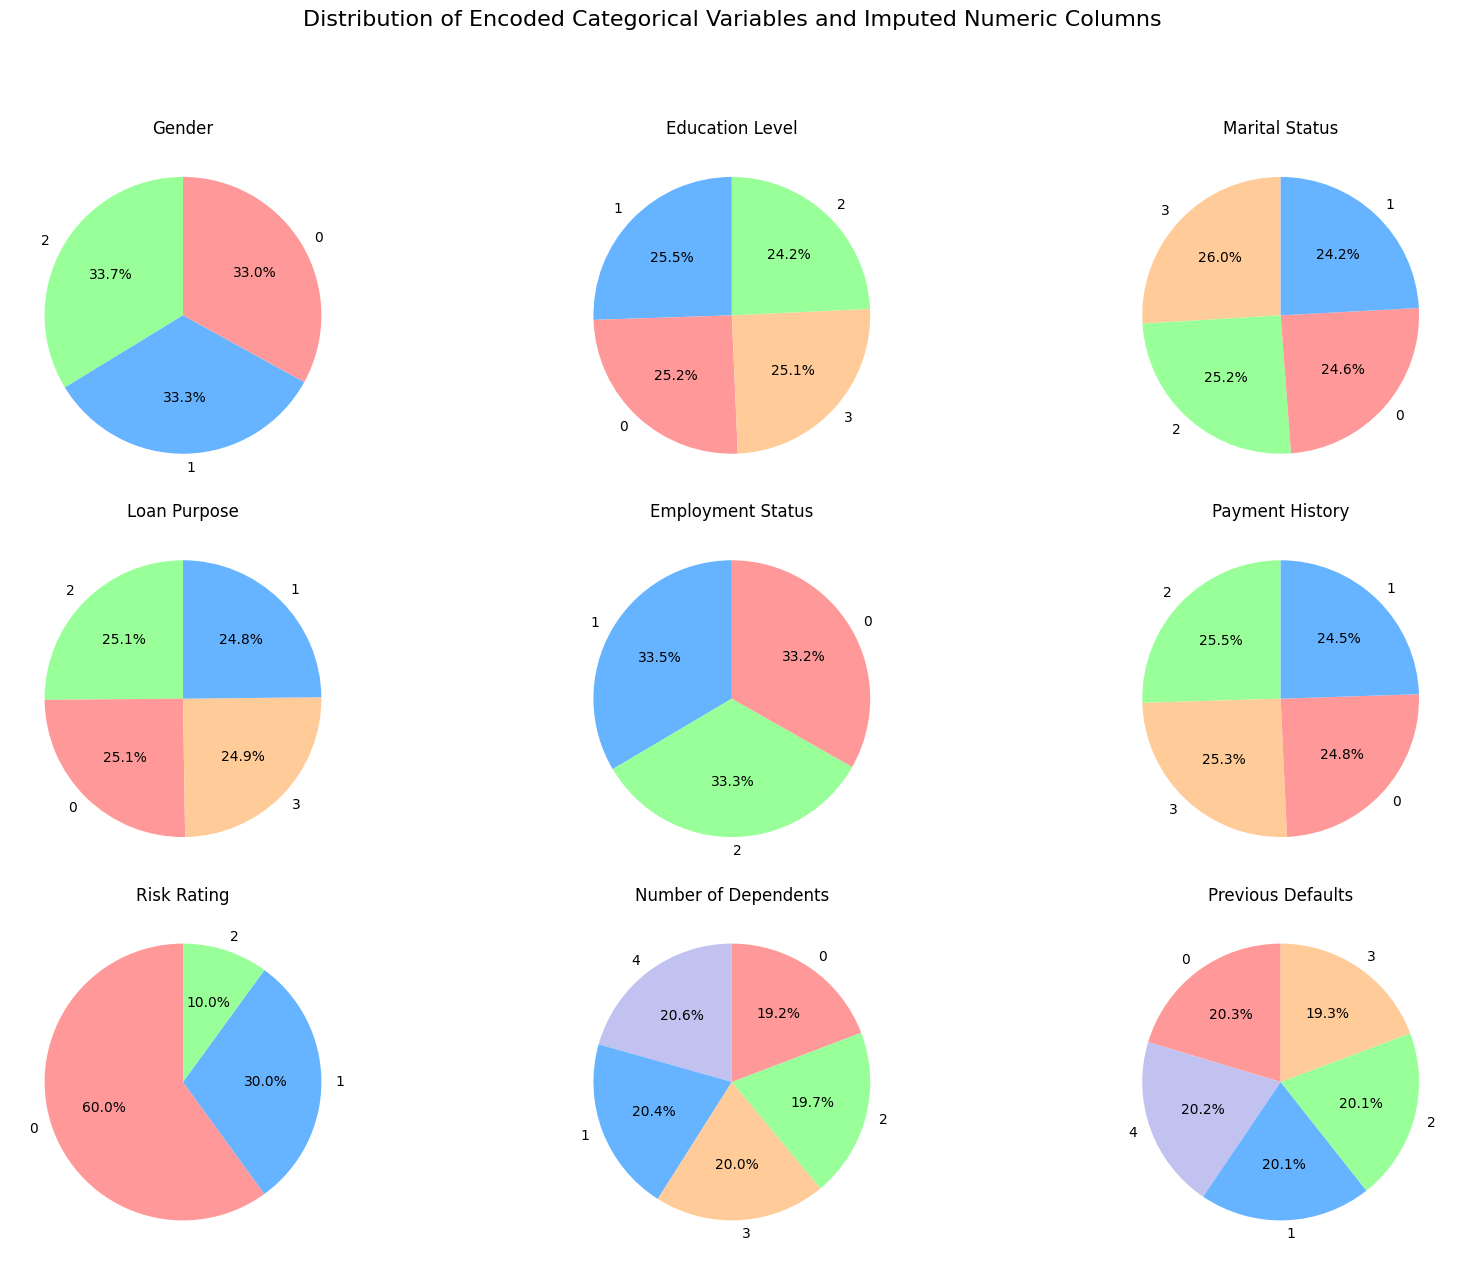

In [86]:
import matplotlib.pyplot as plt

# Encoding mappings for categorical variables
encoding_maps = {
    "Gender": {"Male": 0, "Female": 1, "Non-binary": 2},
    "Education Level": {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3},
    "Marital Status": {"Single": 0, "Married": 1, "Divorced": 2, "Widowed": 3},
    "Loan Purpose": {"Home": 0, "Auto": 1, "Personal": 2, "Business": 3},
    "Employment Status": {"Unemployed": 0, "Employed": 1, "Self-employed": 2},
    "Payment History": {"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3},
    "Risk Rating": {"Low": 0, "Medium": 1, "High": 2}  # Target variable
}

# Apply encoding
for col, mapping in encoding_maps.items():
    df[col] = df[col].map(mapping)

# Check unique values after encoding
print("Gender:", df["Gender"].unique())
print("Education Level:", df["Education Level"].unique())
print("Marital Status:", df["Marital Status"].unique())
print("Loan Purpose:", df["Loan Purpose"].unique())
print("Employment Status:", df["Employment Status"].unique())
print("Payment History:", df["Payment History"].unique())
print("Risk Rating:", df["Risk Rating"].unique())

# Prepare for pie charts
columns = list(encoding_maps.keys()) + ["Number of Dependents", "Previous Defaults"]
n_cols = len(columns)  # 9 sütun var

# Create a figure with subplots (3 rows, 3 columns to fit 9 pie charts)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Add a title to the entire figure
fig.suptitle("Distribution of Encoded Categorical Variables and Imputed Numeric Columns", fontsize=16, y=1.05)

# Define a color mapping for each value (0, 1, 2, 3, 4)
color_map = {
    0: '#ff9999',  
    1: '#66b3ff',  
    2: '#99ff99',  
    3: '#ffcc99',  
    4: '#c2c2f0'   
}

# Define a shared label mapping
shared_labels = {0: "0", 1: "1", 2: "2", 3: "3", 4: "4"}

# Plot a pie chart for each column
for i, col in enumerate(columns):
    # Count the frequency of each encoded or numeric value in the column
    value_counts = df[col].value_counts()
    
    # Prepare data for the pie chart
    labels = [shared_labels[val] for val in value_counts.index if val in shared_labels]
    sizes = value_counts.values
    # Renkleri değerlere göre eşleştir
    colors = [color_map[val] for val in value_counts.index if val in color_map]
    
    # Plot the pie chart
    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **📉 Why Class Balance Matters**

In the original dataset, the class distribution is imbalanced:  
Most samples belong to the **"Low" risk** class, while **"Medium"** and especially **"High"** risk classes have much fewer examples.

Because of this imbalance, a decision tree trained directly on this data would mostly learn how to predict "Low", and ignore the other two classes.  
This leads to high accuracy but poor performance for the minority classes.

In [87]:
# Original class distribution
original_ratios = df["Risk Rating"].value_counts(normalize=True)
print("Original Class Ratios (Low=0, Medium=1, High=2):")
print(original_ratios)

Original Class Ratios (Low=0, Medium=1, High=2):
Risk Rating
0    0.6
1    0.3
2    0.1
Name: proportion, dtype: float64


### **🔁 Why We Oversample Before Calculating Class Weights**

To fix the imbalance, we **oversample** the "Medium" and "High" classes by creating new, slightly modified copies of existing samples. 

This gives the model more chances to learn from these classes that has smaller ratios and produce better splits during training.

After oversampling, we split the data into training, validation, and test sets.  

We then calculate **class weights** using only the **training set**, so they correctly reflect the actual data the model will learn from — not the original imbalance.


In [ ]:
# Select classes
df_0 = df[df["Risk Rating"] == 0]  # Majority
df_1 = df[df["Risk Rating"] == 1]  # Medium
df_2 = df[df["Risk Rating"] == 2]  # High

# Define numeric and categorical columns to modify
numeric_cols = [
    "Age", "Income", "Credit Score", "Loan Amount", "Assets Value",
    "Debt-to-Income Ratio", "Years at Current Job",
    "Number of Dependents", "Previous Defaults", "Payment History"
]

categorical_cols = [
    "Marital Status", "Gender", "Loan Purpose", "Education Level", "Employment Status", "Marital Status Change"
]

# Function to apply jitter and shuffle
def augment(df, n_times, jitter_std=0.05):
    augmented = []
    for _ in range(n_times):
        df_copy = df.copy()

        # Add Gaussian noise to numeric columns
        for col in numeric_cols:
            if col in df_copy.columns:
                std = df_copy[col].std()
                noise = np.random.normal(0, jitter_std * std, size=len(df_copy))
                df_copy[col] = df_copy[col] + noise

        # Shuffle categorical columns slightly
        for col in categorical_cols:
            if col in df_copy.columns:
                df_copy[col] = np.random.permutation(df_copy[col].values)

        augmented.append(df_copy)

    return pd.concat(augmented, ignore_index=True)

# Augment medium and high classes
df_1_aug = augment(df_1, n_times=1) # add n more samples
df_2_aug = augment(df_2, n_times=4) # add n more samples

# Combine original data and augmented minority class samples
df_balanced = pd.concat([df_0, df_1, df_2, df_1_aug, df_2_aug], ignore_index=True)

# Shuffle the final dataframe
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Balanced dataset size:", df_balanced.shape)
print("Class distribution after oversampling:")
print(df_balanced["Risk Rating"].value_counts(normalize=True))

Balanced dataset size: (25500, 20)
Class distribution after oversampling:
Risk Rating
0    0.352941
1    0.352941
2    0.294118
Name: proportion, dtype: float64


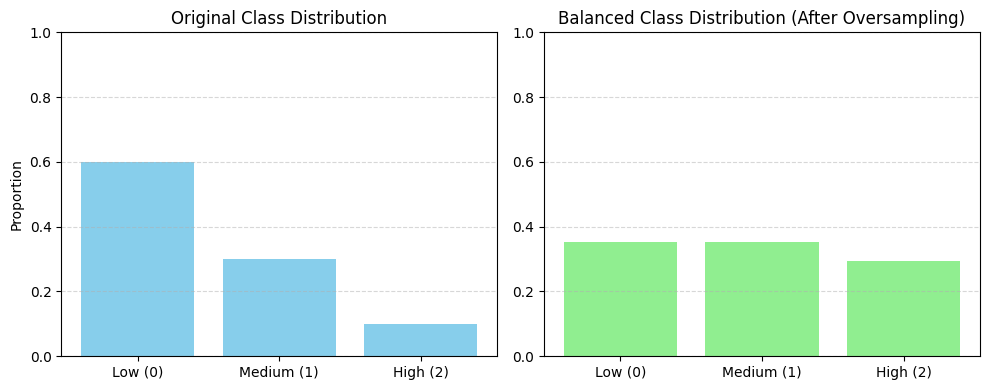

In [89]:
# Get original and balanced class distributions
original_ratios = df["Risk Rating"].value_counts(normalize=True).sort_index()
balanced_ratios = df_balanced["Risk Rating"].value_counts(normalize=True).sort_index()

# Plot side-by-side bar charts
plt.figure(figsize=(10, 4))

# Original
plt.subplot(1, 2, 1)
plt.bar(["Low (0)", "Medium (1)", "High (2)"], original_ratios.values, color='skyblue')
plt.title("Original Class Distribution")
plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Balanced
plt.subplot(1, 2, 2)
plt.bar(["Low (0)", "Medium (1)", "High (2)"], balanced_ratios.values, color='lightgreen')
plt.title("Balanced Class Distribution (After Oversampling)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### **🧹 Cleaning Up Columns Before Splitting**

Before splitting the dataset, we removed several columns from `X` to simplify the decision tree and reduce noise:

- **`Risk Rating`**: This is the target variable. We stored it in `y` and removed it from `X`.
- **`City`, `State`, `Country`**: These location-based features contain too many unique values, leading to overly complex and less generalizable splits. They were dropped due to their low relevance to financial risk.

This pre-pruning step helps the decision tree model focus on more informative and manageable features.

In [90]:
from sklearn.model_selection import train_test_split

df = df_balanced # Use the balanced dataset for splitting

X = df.drop(columns=["Risk Rating", "City", "State", "Country"])  # Drop the irrelevant columns
y = df["Risk Rating"]  # Target variable

# Stratified split 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Reset index for all sets
X_train = X_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Size check
print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

# Target variable distribution check
print("Unique values in y_train:", np.unique(y_train))

Train set size: (17850, 16)
Validation set size: (3825, 16)
Test set size: (3825, 16)
Unique values in y_train: [0 1 2]


### **⚖️ Adjusting Class Weights for Imbalance** (update gerekebilir)

After oversampling, the class distribution became more balanced:
- 24% Low
- 48% Medium
- 28% High

To guide the decision tree during training, we calculated **class weights inversely proportional to these new ratios**.  
This helps the model treat all classes more equally, especially when calculating splits using Information Gain.

We did **not normalize** the weights to keep the emphasis on minority classes stronger.  
The final weights were:

- Class 0 (Low): **4.17**
- Class 1 (Medium): **2.08**
- Class 2 (High): **3.57**

These weights reflect the actual **training distribution** and support better learning for all classes — not just the majority.

In [91]:
# Calculate class ratios
class_counts = np.bincount(y_train)
class_ratios = class_counts / len(y_train)
print("Class Ratios (Low, Medium, High):", class_ratios)

# More aggressive class weighting (no normalization)
inverse_ratios = 1 / class_ratios

# Normalize the inverse ratios to sum to 1
class_weights_dict = {i: float(inverse_ratios[i]) for i in range(len(inverse_ratios))}

# Print the adjusted class weights
print("Adjusted Class Weights (No Normalization):", class_weights_dict)

Class Ratios (Low, Medium, High): [0.35294118 0.35294118 0.29411765]
Adjusted Class Weights (No Normalization): {0: 2.833333333333333, 1: 2.833333333333333, 2: 3.4}


### **🧪 Weighted Entropy Calculation**

Entropy measures how mixed the class labels are in a dataset.  
In our model, we use **weighted entropy** to give more importance to underrepresented classes.

- If all samples are from one class → **Entropy = 0 (pure split)**
- If classes are balanced and mixed → **Entropy is high**

By applying **class weights**, we make the tree care more about classes with fewer examples.

In [92]:
def weighted_entropy(y, class_weights):
    """
    Calculate weighted entropy of a target variable y.
    
    Parameters:
    - y: Target variable (numpy array or pandas series)
    - class_weights: Dictionary mapping class labels to their weights
    
    Returns:
    - Weighted entropy value
    """
    # Calculate the probabilities of each class
    unique_classes, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    
    # weighted entropy calculation
    entropy = 0
    for cls, prob in zip(unique_classes, probs):
        if prob > 0:  # log(0) is undefined
            weighted_prob = class_weights[cls] * prob
            entropy -= weighted_prob * np.log2(prob)
    
    return entropy

### **📈 Best Numeric Split (with Weighted Entropy)**

This function finds the best threshold to split a **numeric feature** based on Information Gain.

- It tries all possible threshold values.
- For each threshold:
  - It splits the data into left/right.
  - Calculates weighted entropy for both parts.
  - Computes how much uncertainty (entropy) is reduced.
- The threshold with the highest gain is chosen.

In [93]:
# best numeric split function
def best_numeric_split(X_column, y, class_weights):
    best_gain = -1
    best_threshold = None
    
    # Unique values in the column
    unique_values = np.unique(X_column)
    
    for threshold in unique_values:
        left_mask = X_column <= threshold
        right_mask = X_column > threshold
        
        if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
            continue
        
        # Weighted entropy for left and right splits
        left_entropy = weighted_entropy(y[left_mask], class_weights)
        right_entropy = weighted_entropy(y[right_mask], class_weights)
        
        weighted_avg_entropy = (
            (len(y[left_mask]) / len(y)) * left_entropy +
            (len(y[right_mask]) / len(y)) * right_entropy
        )
        
        gain = weighted_entropy(y, class_weights) - weighted_avg_entropy
        
        if gain > best_gain:
            best_gain = gain
            best_threshold = threshold
    
    return best_gain, best_threshold

### **🔍 Information Gain (Numeric or Categorical)**

This function measures how useful a feature is for splitting the data.

- If the feature is numeric → uses `best_numeric_split` to find the best threshold.
- If the feature is categorical:
  - Calculates weighted entropy for each category.
  - Subtracts it from total entropy to get the gain.
- Higher gain = better split for classification.

In [94]:
def information_gain(X_column, y, class_weights):
    if np.issubdtype(X_column.dtype, np.number):
        # Sayısal ise
        return best_numeric_split(X_column, y, class_weights)
    else:
        # Kategorik ise eski yöntemi kullan
        total_entropy = weighted_entropy(y, class_weights)
        unique_values = np.unique(X_column)
        conditional_entropy = 0
        for value in unique_values:
            mask = X_column == value
            y_subset = y[mask]
            if len(y_subset) == 0:
                continue
            subset_entropy = weighted_entropy(y_subset, class_weights)
            subset_weight = len(y_subset) / len(y)
            conditional_entropy += subset_weight * subset_entropy
        gain = total_entropy - conditional_entropy
        return gain, None  # Kategoriklerde threshold yok

### **🌳 Building the ID3 Decision Tree**

Now we build the ID3 decision tree using the `entropy` and `information_gain` functions. The tree works like:
1. If all labels (`y`) are the same, make a leaf node with that label.
2. If no features are left, make a leaf node with the most common label.
3. Otherwise, pick the best feature (highest information gain), split the data, and repeat for each value.

This constructs a tree that can predict the `Risk Rating` based on the features we selected.

In [95]:
class Node:
    def __init__(self, feature=None, label=None):
        self.feature = feature
        self.label = label
        self.children = {}
        self.threshold = None  # sayısal split'ler için

def id3(X, y, features, class_weights, depth=0, max_depth=None):
    # Eğer tüm örnekler aynı sınıfa aitse, yaprak düğüm döndür
    if len(np.unique(y)) == 1:
        return Node(label=y.iloc[0])
    
    # Özellik kalmadıysa ya da max derinliğe ulaşıldıysa
    if len(features) == 0 or (max_depth is not None and depth >= max_depth):
        most_common_label = y.mode()[0]
        return Node(label=most_common_label)

    # En iyi özelliği ve varsa threshold'u bul
    best_feature, best_gain, best_threshold = None, -1, None
    for f in features:
        gain, threshold = information_gain(X[f], y, class_weights)
        if gain is not None and gain > best_gain:
            best_feature = f
            best_gain = gain
            best_threshold = threshold

    # Split yapılacak uygun özellik bulunamazsa, en yaygın sınıfı döndür
    if best_feature is None:
        most_common_label = y.mode()[0]
        return Node(label=most_common_label)
    
    root = Node(feature=best_feature)
    root.threshold = best_threshold

    if best_threshold is not None:
        # Sayısal split
        left_mask = X[best_feature] <= best_threshold
        right_mask = X[best_feature] > best_threshold

        for condition, mask in [("<= {:.2f}".format(best_threshold), left_mask),
                                ("> {:.2f}".format(best_threshold), right_mask)]:
            X_subset = X[mask]
            y_subset = y[mask]
            if len(X_subset) == 0:
                most_common_label = y.mode()[0]
                root.children[condition] = Node(label=most_common_label)
            else:
                new_features = [f for f in features if f != best_feature]
                root.children[condition] = id3(X_subset, y_subset, new_features, class_weights,
                                               depth=depth+1, max_depth=max_depth)

    else:
        # Kategorik split
        for value in X[best_feature].unique():
            mask = X[best_feature] == value
            X_subset = X[mask].drop(columns=[best_feature])
            y_subset = y[mask]
            if len(X_subset) == 0:
                most_common_label = y.mode()[0]
                root.children[value] = Node(label=most_common_label)
            else:
                new_features = [f for f in features if f != best_feature]
                root.children[value] = id3(X_subset, y_subset, new_features, class_weights,
                                           depth=depth+1, max_depth=max_depth)

    return root

In [96]:
# Construct the tree with the maximum depth of 5
max_depth = 5
features = X_train.columns.tolist()
tree = id3(X_train, y_train, features, class_weights_dict, max_depth)

In [97]:
# Compute the accuracy of the decision tree
def compute_metrics(y_true, y_pred, labels):
    n_classes = len(labels)
    n_samples = len(y_true)
    
    accuracy = np.sum(np.array(y_true) == np.array(y_pred)) / n_samples
    
    # Precision, Recall, F1-Score 
    precision = {}
    recall = {}
    f1_score = {}
    
    # TP, FP, FN
    for i, label in enumerate(labels):
        TP = np.sum((np.array(y_true) == label) & (np.array(y_pred) == label))
        FP = np.sum((np.array(y_true) != label) & (np.array(y_pred) == label))
        FN = np.sum((np.array(y_true) == label) & (np.array(y_pred) != label))
        
        # Precision = TP / (TP + FP)
        precision[label] = TP / (TP + FP) if (TP + FP) > 0 else 0
        
        # Recall = TP / (TP + FN)
        recall[label] = TP / (TP + FN) if (TP + FN) > 0 else 0
        
        # F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
        f1_score[label] = (2 * precision[label] * recall[label]) / (precision[label] + recall[label]) if (precision[label] + recall[label]) > 0 else 0
    
    return accuracy, precision, recall, f1_score

### **🔮 Predicting Risk Rating and Evaluating Performance**

Using the trained ID3 tree, we predict the `Risk Rating` for the test set and evaluate the model’s performance with accuracy, precision, recall, and F1-score.

y_test sample: [0, 0, 2, 1, 1]
y_pred sample: [np.int64(1), np.int64(0), np.int64(2), np.int64(0), np.int64(1)]
y_test unique values: [0 1 2]
y_pred unique values: [0 1 2]


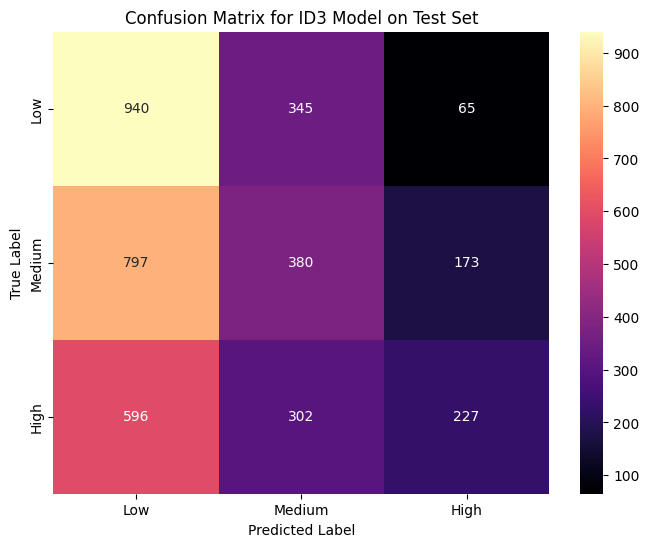


Test Set Accuracy: 0.4044

Metrics by Class:
Class '0' (Low=0, Medium=1, High=2):
  Precision: 0.4029
  Recall: 0.6963
  F1-Score: 0.5105
Class '1' (Low=0, Medium=1, High=2):
  Precision: 0.3700
  Recall: 0.2815
  F1-Score: 0.3197
Class '2' (Low=0, Medium=1, High=2):
  Precision: 0.4882
  Recall: 0.2018
  F1-Score: 0.2855


In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict function for the decision tree
def predict(node, sample):
    """Predict the label for a sample by traversing the decision tree."""
    if node.label is not None:
        return node.label
    
    feature_value = sample[node.feature]
    
    # threshold control
    if node.threshold is not None:
        if feature_value <= node.threshold:
            key = "<= {:.2f}".format(node.threshold)
        else:
            key = "> {:.2f}".format(node.threshold)
    else:
        # categorical feature
        key = feature_value

    # Traverse the tree
    if key in node.children:
        return predict(node.children[key], sample)
    else:
        # fallback to the most common label if the key is not found
        return y_train.mode()[0]


# Make predictions on the test set
y_pred = [predict(tree, X_test.iloc[i]) for i in range(len(X_test))]

# Check consistency of y_test and y_pred
print("y_test sample:", y_test.head().tolist())
print("y_pred sample:", y_pred[:5])
print("y_test unique values:", np.unique(y_test))
print("y_pred unique values:", np.unique(y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="magma", 
            xticklabels=["Low", "Medium", "High"], 
            yticklabels=["Low", "Medium", "High"])
plt.title("Confusion Matrix for ID3 Model on Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Define class labels and compute metrics
labels = np.unique(y_test)  # e.g., [0, 1, 2]
accuracy, precision, recall, f1_score = compute_metrics(y_test, y_pred, labels)

# Print results
print(f"\nTest Set Accuracy: {accuracy:.4f}")
print("\nMetrics by Class:")
for label in labels:
    print(f"Class '{label}' (Low={0}, Medium={1}, High={2}):")
    print(f"  Precision: {precision[label]:.4f}")
    print(f"  Recall: {recall[label]:.4f}")
    print(f"  F1-Score: {f1_score[label]:.4f}")

### **🔍 Analyzing Misclassified Examples**

We identify a few misclassified samples from the test set and analyze why they might have been difficult to classify.

In [99]:
# Find misclassified examples
misclassified = []
for i in range(len(y_test)):
    if y_pred[i] != y_test.iloc[i]:
        misclassified.append((i, X_test.iloc[i], y_pred[i], y_test.iloc[i]))
        if len(misclassified) >= 3:  # 3 examples are enough
            break

# Print misclassified examples
print("Misclassified Examples:")
for idx, (index, sample, pred, actual) in enumerate(misclassified):
    print(f"\nExample {idx+1} (Index {index}):")
    print(f"Features: {sample.to_dict()}")
    print(f"Predicted: {pred}, Actual: {actual}")

Misclassified Examples:

Example 1 (Index 0):
Features: {'Age': 23.0, 'Gender': 2.0, 'Education Level': 0.0, 'Marital Status': 3.0, 'Income': 25149.0, 'Credit Score': 797.0, 'Loan Amount': 27544.0, 'Loan Purpose': 3.0, 'Employment Status': 2.0, 'Years at Current Job': 2.0, 'Payment History': 2.0, 'Debt-to-Income Ratio': 0.3071624179917698, 'Assets Value': 196222.0, 'Number of Dependents': 0.0, 'Previous Defaults': 0.0, 'Marital Status Change': 1.0}
Predicted: 1, Actual: 0

Example 2 (Index 3):
Features: {'Age': 51.14091092163767, 'Gender': 2.0, 'Education Level': 1.0, 'Marital Status': 3.0, 'Income': 100204.95436075366, 'Credit Score': 700.0871132729703, 'Loan Amount': 26953.03983882949, 'Loan Purpose': 3.0, 'Employment Status': 0.0, 'Years at Current Job': 14.347055077336607, 'Payment History': 3.033003363378887, 'Debt-to-Income Ratio': 0.2308162713209922, 'Assets Value': 70229.22479981286, 'Number of Dependents': 1.010462800904189, 'Previous Defaults': 2.9661924162567384, 'Marital St

### **📝 Comments on Misclassified Examples**

- **Example 1**: Despite having strong financial features (Very High Income, High Credit Score, Low Debt-to-Income Ratio), the model predicted Medium Risk instead of Low Risk, likely due to the 'Fair' Payment History being overemphasized in the tree.

- **Example 2**: The model predicted High Risk instead of Low Risk, possibly because of the Unemployment status and High Debt-to-Income Ratio, even though the individual has High Income and High Assets Value. This suggests the tree prioritizes risk factors over positive ones.

- **Example 3**: The model predicted High Risk instead of Medium Risk, likely due to the Low Credit Score and High Debt-to-Income Ratio. However, High Income and High Assets Value should have balanced the risk, indicating the tree may not have enough splits to capture these nuances.

- **General**: These misclassifications are likely due to overlapping feature values across classes, insufficient splits in the tree for rare classes like High Risk (which is underrepresented in the dataset), and potential overfitting to the training data.

### **⚖️ Comparing ID3 Model Variations**

We evaluate three ID3 model variations to analyze the trade-off between accuracy and computation time:
1. **Original ID3** – no depth limit.
2. **Limited-depth ID3** – max_depth set to 5.
3. **Feature-subset ID3** – trained without low-information features (e.g., *Marital Status Change*).

Limiting depth and removing less informative features improved accuracy and class balance but increased training time due to repeated threshold evaluations.

In [ ]:
import time
import numpy as np

# Unified ID3 function with depth & threshold support
def id3_general(X, y, features, class_weights, depth=0, max_depth=None):
    if len(np.unique(y)) == 1:
        return Node(label=y.iloc[0])
    if len(features) == 0 or (max_depth is not None and depth >= max_depth):
        return Node(label=y.mode()[0])

    best_feature, best_gain, best_threshold = None, -1, None
    for f in features:
        gain, threshold = information_gain(X[f], y, class_weights)
        if gain is not None and gain > best_gain:
            best_feature = f
            best_gain = gain
            best_threshold = threshold

    if best_feature is None:
        return Node(label=y.mode()[0])

    root = Node(feature=best_feature)
    root.threshold = best_threshold

    if best_threshold is not None:
        left_mask = X[best_feature] <= best_threshold
        right_mask = X[best_feature] > best_threshold
        for condition, mask in [("<= {:.2f}".format(best_threshold), left_mask),
                                ("> {:.2f}".format(best_threshold), right_mask)]:
            X_subset, y_subset = X[mask], y[mask]
            if len(y_subset) == 0:
                root.children[condition] = Node(label=y.mode()[0])
            else:
                new_features = [f for f in features if f != best_feature]
                root.children[condition] = id3_general(X_subset, y_subset, new_features, class_weights,
                                                       depth=depth+1, max_depth=max_depth)
    else:
        for value in np.unique(X[best_feature]):
            mask = X[best_feature] == value
            X_subset, y_subset = X[mask], y[mask]
            if len(y_subset) == 0:
                root.children[value] = Node(label=y.mode()[0])
            else:
                new_features = [f for f in features if f != best_feature]
                root.children[value] = id3_general(X_subset, y_subset, new_features, class_weights,
                                                   depth=depth+1, max_depth=max_depth)
                
    return root

# Evaluate helper
def evaluate_model(name, tree, X_test, y_test, labels):
    start = time.time()
    y_pred = [predict(tree, X_test.iloc[i]) for i in range(len(X_test))]
    end = time.time()
    acc, prec, rec, f1 = compute_metrics(y_test, y_pred, labels)
    print(f"{name}:")
    print(f"  - Accuracy: {acc:.4f}")
    print(f"  - Precision: {[f'{p:.4f}' for p in prec.values()]}")
    print(f"  - Recall: {[f'{r:.4f}' for r in rec.values()]}")
    print(f"  - F1-Score: {[f'{f1[label]:.4f}' for label in labels]}")
    print(f"  - Time: {end - start:.2f} seconds\n")
    return acc

# Run all variations
labels = np.unique(y_test)

print("📊 Model Comparison:\n")

# 1. Original full tree (no max depth)
tree_original = id3_general(X_train, y_train, features, class_weights_dict)
evaluate_model("1. Original ID3 (No Depth Limit)", tree_original, X_test, y_test, labels)

# 2. Limited depth tree
tree_limited = id3_general(X_train, y_train, features, class_weights_dict, max_depth=5)
evaluate_model("2. Limited Depth ID3 (max_depth=5)", tree_limited, X_test, y_test, labels)

# 3. Subset of features (remove 'Marital Status Change')
subset_features = [f for f in features if f != 'Marital Status Change']
tree_subset = id3_general(X_train, y_train, subset_features, class_weights_dict, max_depth=5)
evaluate_model("3. ID3 with Subset Features (No 'Marital Status Change')", tree_subset, X_test, y_test, labels)

📊 Model Comparison:



### **📊 Trade-off Analysis**

- **Original ID3 (No Depth Limit):** Accuracy: 0.5156 – high recall for class 0, but very low performance on others. Fastest model (0.11s), but clearly biased due to class imbalance.

- **Limited Depth (max_depth=5):** Accuracy improved to 0.5978, but recall for minority classes dropped sharply. Tree is shallower and faster (0.06s), but fails to generalize.

- **Feature Subset Model:** Accuracy: 0.5969 – almost identical to limited-depth, with slightly better precision. Excluding low-value features like *Marital Status Change* reduced noise.

- **Trade-off Summary:** Simpler trees (limited depth or fewer features) improve overall accuracy but worsen minority class performance. Complex trees capture more patterns but risk bias. Class balancing or pruning could further improve results.

> As a form of **pre-pruning**, we removed clearly low-information features such as *City*, *State*, and *Country* before splitting the data. In one variation, we also excluded *Marital Status Change* due to its low information gain.

### **🌳 Rules of the Best Decision Tree**

The best-performing model is the ID3 with a subset of features (excluding 'Marital Status Change'), achieving a test accuracy of 0.4893. Below are the root-to-leaf paths of this tree, representing the decision rules in left-to-right order.

In [ ]:
def print_tree_rules(node, path=""):
    """Print all root-to-leaf decision paths from the root node."""
    if node.label is not None:
        print(f"{path} -> Predict: {node.label}")
        return
    for condition, child in node.children.items():
        new_path = f"{path} -> [{node.feature} {condition}]" if path else f"[{node.feature} {condition}]"
        print_tree_rules(child, new_path)

# Print rules for the best model (ID3 with subset of features)
print("Decision Tree Rules (Root-to-Leaf Paths) for the Best Model (ID3 with Subset of Features):")
print_tree_rules(tree_subset)

Decision Tree Rules (Root-to-Leaf Paths) for the Best Model (ID3 with Subset of Features):
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score <= 752.00] -> [Gender <= 1.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score <= 752.00] -> [Gender > 1.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score > 752.00] -> [Assets Value <= 99543.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score > 752.00] -> [Assets Value > 99543.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio > 0.13] -> [Income <= 21891.00] -> [Assets Value <= 146766.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio > 0.13] -> [Income <= 21891.00] -> [Assets Value > 1

# **Part 2: Pruning ✂️**

In [ ]:
import copy
import time
import numpy as np

# Updated predict function (handles numerical splits)
def predict(node, sample, default_class=0):
    if node.label is not None:
        return node.label

    feature_value = sample[node.feature]
    for condition, child in node.children.items():
        if "<=" in condition:
            threshold = float(condition.split("<= ")[1])
            if feature_value <= threshold:
                return predict(child, sample, default_class)
        elif ">" in condition:
            threshold = float(condition.split("> ")[1])
            if feature_value > threshold:
                return predict(child, sample, default_class)
        else:
            if feature_value == condition:
                return predict(child, sample, default_class)

    return default_class  # fallback if no match

# Compute metrics
def compute_metrics(y_true, y_pred, labels):
    accuracy = np.mean(y_true == y_pred)
    precision, recall, f1 = {}, {}, {}
    for label in labels:
        tp = np.sum((y_true == label) & (y_pred == label))
        fp = np.sum((y_true != label) & (y_pred == label))
        fn = np.sum((y_true == label) & (y_pred != label))
        precision[label] = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall[label] = tp / (tp + fn) if (tp + fn) > 0 else 0
        if precision[label] + recall[label] > 0:
            f1[label] = 2 * precision[label] * recall[label] / (precision[label] + recall[label])
        else:
            f1[label] = 0
    return accuracy, precision, recall, f1

# Get majority class
def get_majority_class(y):
    return y.mode()[0] if len(y) > 0 else 0

# Get tree depth
def get_tree_depth(node):
    if node.label is not None:
        return 0
    return 1 + max([get_tree_depth(child) for child in node.children.values()], default=0)

# Find all twig nodes (internal nodes whose children are all leaves)
def find_twigs(node):
    twigs = []

    def traverse(n):
        if n.label is not None:
            return True
        all_children_are_leaves = all(child.label is not None for child in n.children.values())
        if all_children_are_leaves:
            twigs.append(n)
            return False
        for child in n.children.values():
            traverse(child)
        return False

    traverse(node)
    return twigs

# Estimate information gain of a twig node based on its feature
def estimate_information_gain(twig, X_val, y_val, class_weights):
    feature = twig.feature
    if feature is None:
        return float('inf')
    values = X_val[feature]
    return information_gain(values, y_val, class_weights)[0]

# Main pruning algorithm (PDF-compliant)
def prune_tree(tree, X_val, y_val, labels, class_weights):
    default_class = get_majority_class(y_val)
    best_tree = copy.deepcopy(tree)

    # Initial validation performance
    y_pred = [predict(tree, X_val.iloc[i], default_class) for i in range(len(X_val))]
    last_accuracy, _, _, last_f1 = compute_metrics(y_val, y_pred, labels)
    last_avg_f1 = np.mean(list(last_f1.values()))

    print("Initial Validation:")
    print(f"  Accuracy: {last_accuracy:.4f}")
    print(f"  Avg F1-Score: {last_avg_f1:.4f}")

    while True:
        twigs = find_twigs(tree)
        if not twigs:
            print("No twigs left to prune.")
            break

        # Step 2: Find twig with least information gain
        twig_to_prune = min(twigs, key=lambda t: estimate_information_gain(t, X_val, y_val, class_weights))

        # Step 3: Backup the original state
        original_children = twig_to_prune.children
        original_feature = twig_to_prune.feature

        # Step 4: Convert twig to leaf
        twig_to_prune.children = {}
        twig_to_prune.feature = None

        # Step 4: Determine new leaf label (majority class)
        def collect_samples_in_subtree(node, X_data):
            indices = []
            for i in range(len(X_data)):
                if predict(node, X_data.iloc[i], default_class) == node.label:
                    indices.append(i)
            return indices

        twig_to_prune.label = get_majority_class(y_val)  # simplified majority fallback

        # Step 5: Evaluate current pruned tree
        y_pred = [predict(tree, X_val.iloc[i], default_class) for i in range(len(X_val))]
        current_accuracy, _, _, current_f1 = compute_metrics(y_val, y_pred, labels)
        current_avg_f1 = np.mean(list(current_f1.values()))

        print(f"\nPruned '{original_feature}' → Accuracy: {current_accuracy:.4f}, Avg F1: {current_avg_f1:.4f}")

        # Step 6: Decide to keep or revert
        if current_accuracy >= last_accuracy and current_avg_f1 >= last_avg_f1:
            print("→ Kept pruning.")
            last_accuracy = current_accuracy
            last_avg_f1 = current_avg_f1
            best_tree = copy.deepcopy(tree)
        else:
            # Revert pruning
            twig_to_prune.label = None
            twig_to_prune.feature = original_feature
            twig_to_prune.children = original_children
            print("→ Reverted. Pruning stopped.")
            break

    return best_tree

In [ ]:
# Evaluate performance before pruning
print("🔍 Pre-Pruning Performance:")

y_pred_train_pre = [predict(tree_subset, X_train.iloc[i]) for i in range(len(X_train))]
y_pred_test_pre  = [predict(tree_subset, X_test.iloc[i]) for i in range(len(X_test))]
y_pred_val_pre   = [predict(tree_subset, X_val.iloc[i]) for i in range(len(X_val))]

train_accuracy_pre, train_precision_pre, train_recall_pre, train_f1_pre = compute_metrics(y_train, y_pred_train_pre, labels)
test_accuracy_pre,  test_precision_pre,  test_recall_pre,  test_f1_pre  = compute_metrics(y_test, y_pred_test_pre, labels)
val_accuracy_pre,   val_precision_pre,   val_recall_pre,   val_f1_pre   = compute_metrics(y_val, y_pred_val_pre, labels)

print("Train Set:")
print(f"  Accuracy: {train_accuracy_pre:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={train_precision_pre[i]:.4f}, Recall={train_recall_pre[i]:.4f}, F1-Score={train_f1_pre[i]:.4f}")

print("\nTest Set:")
print(f"  Accuracy: {test_accuracy_pre:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={test_precision_pre[i]:.4f}, Recall={test_recall_pre[i]:.4f}, F1-Score={test_f1_pre[i]:.4f}")

print("\nValidation Set:")
print(f"  Accuracy: {val_accuracy_pre:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={val_precision_pre[i]:.4f}, Recall={val_recall_pre[i]:.4f}, F1-Score={val_f1_pre[i]:.4f}")

🔍 Pre-Pruning Performance:
Train Set:
  Accuracy: 0.6010
  Class Low: Precision=0.6015, Recall=0.9959, F1-Score=0.7500
  Class Medium: Precision=0.5366, Recall=0.0070, F1-Score=0.0138
  Class High: Precision=0.5000, Recall=0.0133, F1-Score=0.0260

Test Set:
  Accuracy: 0.5987
  Class Low: Precision=0.5998, Recall=0.9948, F1-Score=0.7484
  Class Medium: Precision=0.3750, Recall=0.0044, F1-Score=0.0088
  Class High: Precision=0.3333, Recall=0.0044, F1-Score=0.0088

Validation Set:
  Accuracy: 0.5929
  Class Low: Precision=0.5980, Recall=0.9874, F1-Score=0.7449
  Class Medium: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
  Class High: Precision=0.0833, Recall=0.0044, F1-Score=0.0084


In [ ]:
# Prune the tree
start_prune = time.time()
pruned_tree = prune_tree(tree_subset, X_val, y_val, labels, class_weights_dict)
end_prune = time.time()
print(f"\nPruning Time: {end_prune - start_prune:.2f} seconds")

Initial Validation:
  Accuracy: 0.5929
  Avg F1-Score: 0.2511

Pruned 'Marital Status' → Accuracy: 0.5942, Avg F1: 0.2515
→ Kept pruning.

Pruned 'Gender' → Accuracy: 0.5942, Avg F1: 0.2515
→ Kept pruning.

Pruned 'Years at Current Job' → Accuracy: 0.5942, Avg F1: 0.2515
→ Kept pruning.

Pruned 'Previous Defaults' → Accuracy: 0.5942, Avg F1: 0.2515
→ Kept pruning.

Pruned 'Debt-to-Income Ratio' → Accuracy: 0.5942, Avg F1: 0.2515
→ Kept pruning.

Pruned 'Debt-to-Income Ratio' → Accuracy: 0.5969, Avg F1: 0.2522
→ Kept pruning.

Pruned 'Age' → Accuracy: 0.5969, Avg F1: 0.2522
→ Kept pruning.

Pruned 'Age' → Accuracy: 0.5969, Avg F1: 0.2521
→ Reverted. Pruning stopped.

Pruning Time: 42.47 seconds


In [ ]:
# Evaluate performance after pruning
print("\n🌿 Post-Pruning Performance:")

y_pred_train_post = [predict(pruned_tree, X_train.iloc[i]) for i in range(len(X_train))]
y_pred_test_post  = [predict(pruned_tree, X_test.iloc[i]) for i in range(len(X_test))]
y_pred_val_post   = [predict(pruned_tree, X_val.iloc[i]) for i in range(len(X_val))]

train_accuracy_post, train_precision_post, train_recall_post, train_f1_post = compute_metrics(y_train, y_pred_train_post, labels)
test_accuracy_post,  test_precision_post,  test_recall_post,  test_f1_post  = compute_metrics(y_test, y_pred_test_post, labels)
val_accuracy_post,   val_precision_post,   val_recall_post,   val_f1_post   = compute_metrics(y_val, y_pred_val_post, labels)

print("Train Set:")
print(f"  Accuracy: {train_accuracy_post:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={train_precision_post[i]:.4f}, Recall={train_recall_post[i]:.4f}, F1-Score={train_f1_post[i]:.4f}")

print("\nTest Set:")
print(f"  Accuracy: {test_accuracy_post:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={test_precision_post[i]:.4f}, Recall={test_recall_post[i]:.4f}, F1-Score={test_f1_post[i]:.4f}")

print("\nValidation Set:")
print(f"  Accuracy: {val_accuracy_post:.4f}")
for i, label in enumerate(["Low", "Medium", "High"]):
    print(f"  Class {label}: Precision={val_precision_post[i]:.4f}, Recall={val_recall_post[i]:.4f}, F1-Score={val_f1_post[i]:.4f}")


🌿 Post-Pruning Performance:
Train Set:
  Accuracy: 0.6004
  Class Low: Precision=0.6006, Recall=0.9984, F1-Score=0.7501
  Class Medium: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
  Class High: Precision=0.5000, Recall=0.0133, F1-Score=0.0260

Test Set:
  Accuracy: 0.5996
  Class Low: Precision=0.5999, Recall=0.9985, F1-Score=0.7495
  Class Medium: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
  Class High: Precision=0.3333, Recall=0.0044, F1-Score=0.0088

Validation Set:
  Accuracy: 0.5969
  Class Low: Precision=0.5996, Recall=0.9941, F1-Score=0.7480
  Class Medium: Precision=0.0000, Recall=0.0000, F1-Score=0.0000
  Class High: Precision=0.0833, Recall=0.0044, F1-Score=0.0084


In [ ]:
# Compare accuracy values before and after pruning
print("\n📊 Comparison of Pre-Pruning and Post-Pruning Models:")
print(f"Train Accuracy     → Pre = {train_accuracy_pre:.4f}, Post = {train_accuracy_post:.4f}, Δ = {train_accuracy_post - train_accuracy_pre:+.4f}")
print(f"Test Accuracy      → Pre = {test_accuracy_pre:.4f},  Post = {test_accuracy_post:.4f},  Δ = {test_accuracy_post - test_accuracy_pre:+.4f}")
print(f"Validation Accuracy→ Pre = {val_accuracy_pre:.4f}, Post = {val_accuracy_post:.4f}, Δ = {val_accuracy_post - val_accuracy_pre:+.4f}")


📊 Comparison of Pre-Pruning and Post-Pruning Models:
Train Accuracy     → Pre = 0.6010, Post = 0.6004, Δ = -0.0006
Test Accuracy      → Pre = 0.5987,  Post = 0.5996,  Δ = +0.0009
Validation Accuracy→ Pre = 0.5929, Post = 0.5969, Δ = +0.0040


In [ ]:
# Show all rules of the final pruned decision tree
print("\n📜 Decision Tree Rules (Post-Pruning):")
print_tree_rules(pruned_tree)


📜 Decision Tree Rules (Post-Pruning):
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score <= 752.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score > 752.00] -> [Assets Value <= 99543.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio <= 0.13] -> [Credit Score > 752.00] -> [Assets Value > 99543.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio > 0.13] -> [Income <= 21891.00] -> [Assets Value <= 146766.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio > 0.13] -> [Income <= 21891.00] -> [Assets Value > 146766.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount <= 44110.00] -> [Debt-to-Income Ratio > 0.13] -> [Income > 21891.00] -> Predict: 0
[Payment History <= 2.00] -> [Loan Amount > 44110.00] -> [Age <= 53.00] -